# Import Libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Dataset

In [5]:
df = pd.read_csv('workout_fitness_tracker_data.csv')
df

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,20,Other,173,59,Yoga,95,230,160,1330,12.83,Medium,10.0,1.9,3718,56,38.4,28.5,Neutral,Neutral
9996,9997,29,Female,171,71,HIIT,83,539,170,3236,9.74,Low,9.4,1.9,2752,72,38.4,28.5,Tired,Fatigued
9997,9998,47,Male,183,75,Running,89,886,114,10532,14.51,Medium,8.1,1.9,1572,73,38.4,28.5,Neutral,Fatigued
9998,9999,52,Male,170,97,HIIT,28,447,102,13690,1.43,Low,7.3,1.9,2172,84,38.4,28.5,Stressed,Fatigued


## Check The Data

In [8]:
df.head()

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


In [12]:
df.shape

(10000, 20)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null  float64
 14  Daily C

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,10000.0,5000.500000,2.886896e+03,1.0,2500.75,5000.50,7500.25,10000.0
Age,10000.0,38.390100,1.217164e+01,18.0,28.00,38.00,49.00,59.0
Height (cm),10000.0,174.275100,1.444099e+01,150.0,162.00,174.00,187.00,199.0
Weight (kg),10000.0,84.903000,2.018994e+01,50.0,67.00,85.00,102.00,119.0
Workout Duration (mins),10000.0,64.464800,3.181495e+01,10.0,37.00,64.00,92.00,119.0
Calories Burned,10000.0,552.100800,2.606299e+02,100.0,325.00,554.00,776.00,999.0
Heart Rate (bpm),10000.0,129.526700,2.887415e+01,80.0,105.00,130.00,155.00,179.0
Steps Taken,10000.0,10455.496600,5.486424e+03,1000.0,5673.00,10434.50,15211.00,19998.0
Distance (km),10000.0,7.820745,4.159148e+00,0.5,4.24,7.85,11.41,15.0
Sleep Hours,10000.0,6.982820,1.708738e+00,4.0,5.50,7.00,8.40,10.0


In [18]:
df.sample

<bound method NDFrame.sample of       User ID  Age  Gender  Height (cm)  Weight (kg) Workout Type  \
0           1   39    Male          175           99      Cycling   
1           2   36   Other          157          112       Cardio   
2           3   25  Female          180           66         HIIT   
3           4   56    Male          154           89      Cycling   
4           5   53   Other          194           59     Strength   
...       ...  ...     ...          ...          ...          ...   
9995     9996   20   Other          173           59         Yoga   
9996     9997   29  Female          171           71         HIIT   
9997     9998   47    Male          183           75      Running   
9998     9999   52    Male          170           97         HIIT   
9999    10000   47  Female          186           88         HIIT   

      Workout Duration (mins)  Calories Burned  Heart Rate (bpm)  Steps Taken  \
0                          79              384            

In [20]:
df.nunique()

User ID                     10000
Age                            42
Gender                          3
Height (cm)                    50
Weight (kg)                    70
Workout Type                    6
Workout Duration (mins)       110
Calories Burned               900
Heart Rate (bpm)              100
Steps Taken                  7767
Distance (km)                1449
Workout Intensity               3
Sleep Hours                    61
Water Intake (liters)           1
Daily Calories Intake        2445
Resting Heart Rate (bpm)       40
VO2 Max                         1
Body Fat (%)                    1
Mood Before Workout             4
Mood After Workout              3
dtype: int64

In [22]:
df.duplicated().sum()

0

In [24]:
df.isna().sum()

User ID                     0
Age                         0
Gender                      0
Height (cm)                 0
Weight (kg)                 0
Workout Type                0
Workout Duration (mins)     0
Calories Burned             0
Heart Rate (bpm)            0
Steps Taken                 0
Distance (km)               0
Workout Intensity           0
Sleep Hours                 0
Water Intake (liters)       0
Daily Calories Intake       0
Resting Heart Rate (bpm)    0
VO2 Max                     0
Body Fat (%)                0
Mood Before Workout         0
Mood After Workout          0
dtype: int64

In [26]:
df.describe(include='all')

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
count,10000.00000,10000.000000,10000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.0,10000,10000
unique,NaN,NaN,3,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,4,3
top,NaN,NaN,Other,NaN,NaN,HIIT,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN,NaN,NaN,NaN,NaN,Tired,Neutral
freq,NaN,NaN,3392,NaN,NaN,1731,NaN,NaN,NaN,NaN,NaN,3357,NaN,NaN,NaN,NaN,NaN,NaN,2553,3356
mean,5000.50000,38.390100,NaN,174.275100,84.903000,NaN,64.464800,552.100800,129.526700,10455.496600,7.820745,NaN,6.982820,1.900000e+00,2748.428800,69.486500,3.840000e+01,28.5,NaN,NaN
std,2886.89568,12.171637,NaN,14.440986,20.189937,NaN,31.814946,260.629908,28.874152,5486.423716,4.159148,NaN,1.708738,2.109529e-14,717.109026,11.566763,4.590336e-12,0.0,NaN,NaN
min,1.00000,18.000000,NaN,150.000000,50.000000,NaN,10.000000,100.000000,80.000000,1000.000000,0.500000,NaN,4.000000,1.900000e+00,1500.000000,50.000000,3.840000e+01,28.5,NaN,NaN
25%,2500.75000,28.000000,NaN,162.000000,67.000000,NaN,37.000000,325.000000,105.000000,5673.000000,4.240000,NaN,5.500000,1.900000e+00,2124.000000,60.000000,3.840000e+01,28.5,NaN,NaN
50%,5000.50000,38.000000,NaN,174.000000,85.000000,NaN,64.000000,554.000000,130.000000,10434.500000,7.850000,NaN,7.000000,1.900000e+00,2753.000000,69.000000,3.840000e+01,28.5,NaN,NaN
75%,7500.25000,49.000000,NaN,187.000000,102.000000,NaN,92.000000,776.000000,155.000000,15211.000000,11.410000,NaN,8.400000,1.900000e+00,3360.000000,80.000000,3.840000e+01,28.5,NaN,NaN


## Exploratory Data Analysis

In [10]:
colors = ['#D991AB', '#F280DF', '#394A59', '#75B2BF', '#F2C8C4', '#67687', '#322759', '#F280BF']

In [7]:
numeric_cols = ['Age', 'Height (cm)', 'Weight (kg)', 'Workout Duration (mins)', 'Calories Burned', 'Heart Rate (bpm)', 
                'Steps Taken', 'Distance (km)', 'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake', 'Resting Heart Rate (bpm)']

categorical_cols = ['Gender', 'Workout Type', 'Workout Intensity', 'Mood Before Workout', 'Mood After Workout']

print(len(numeric_cols))
print(len(categorical_cols))

12
5


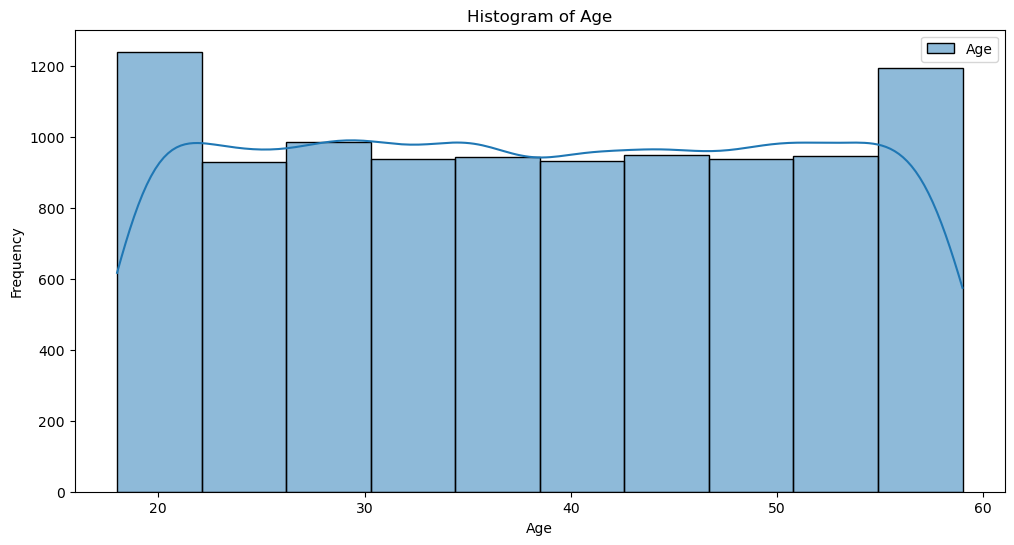

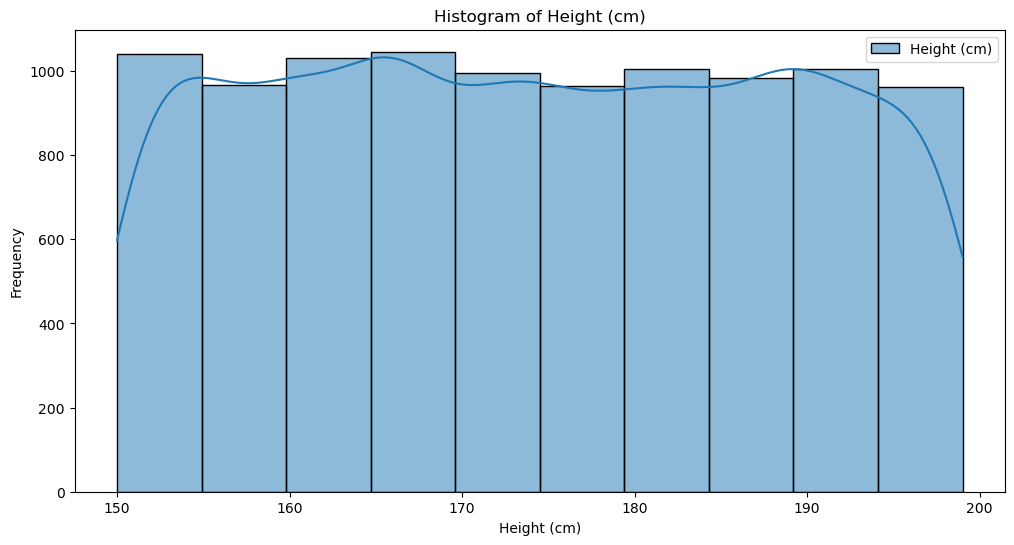

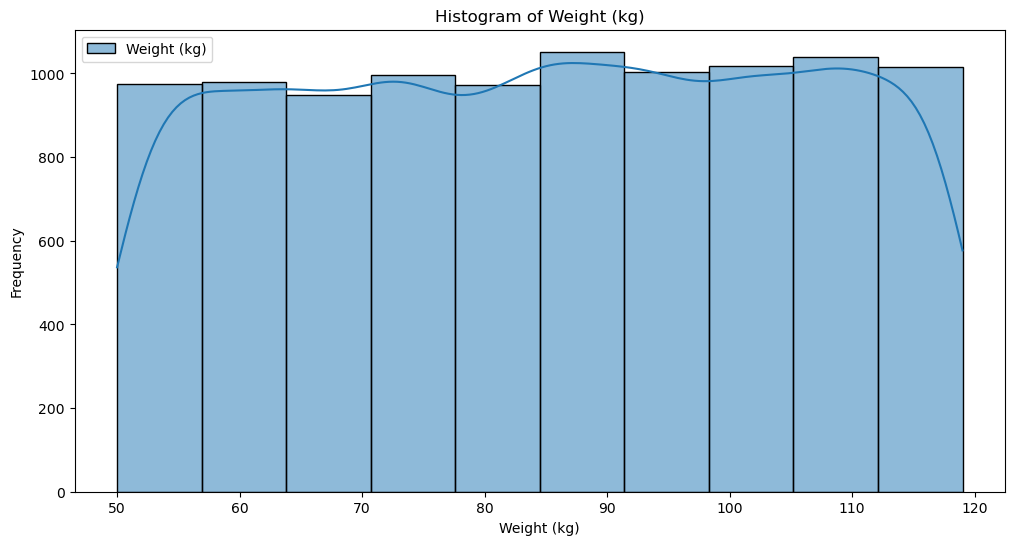

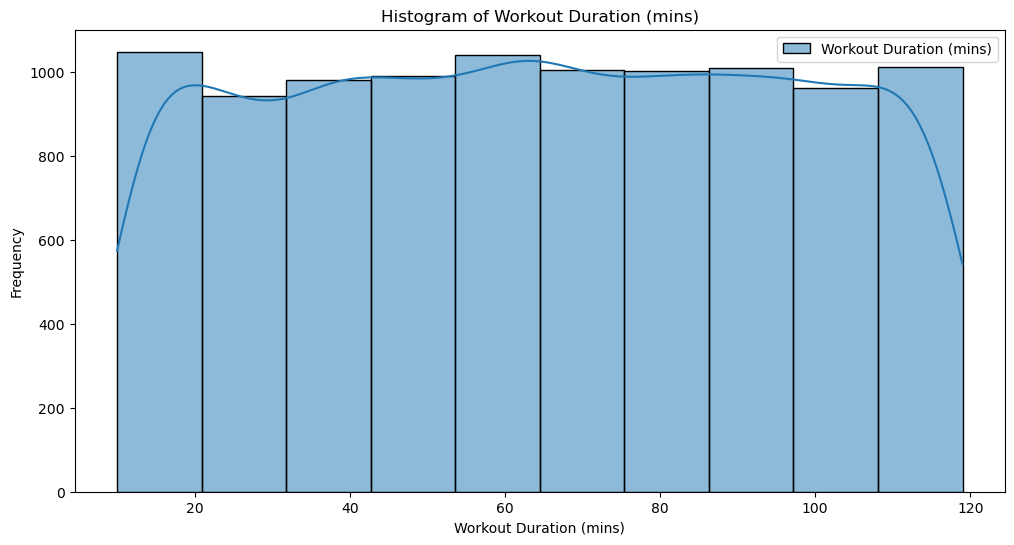

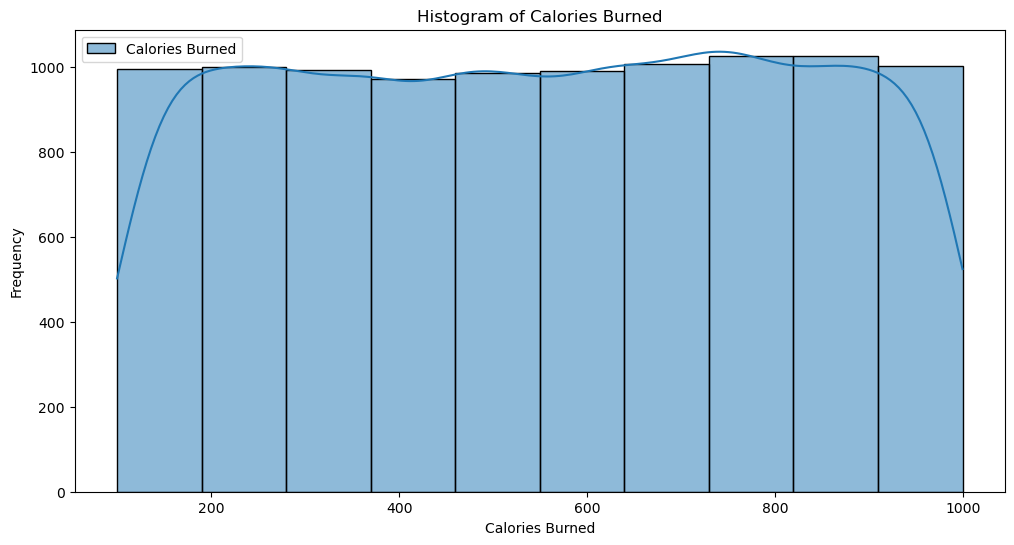

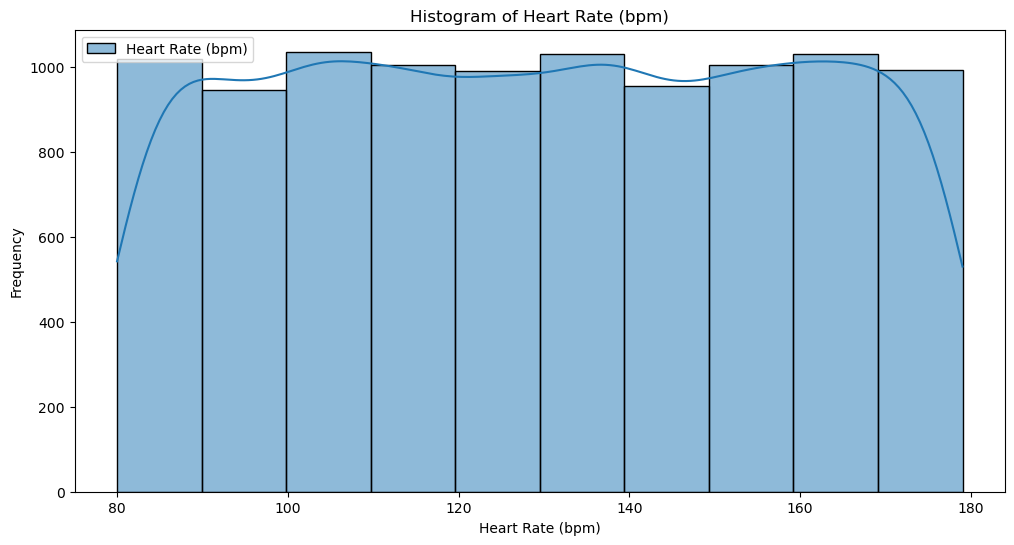

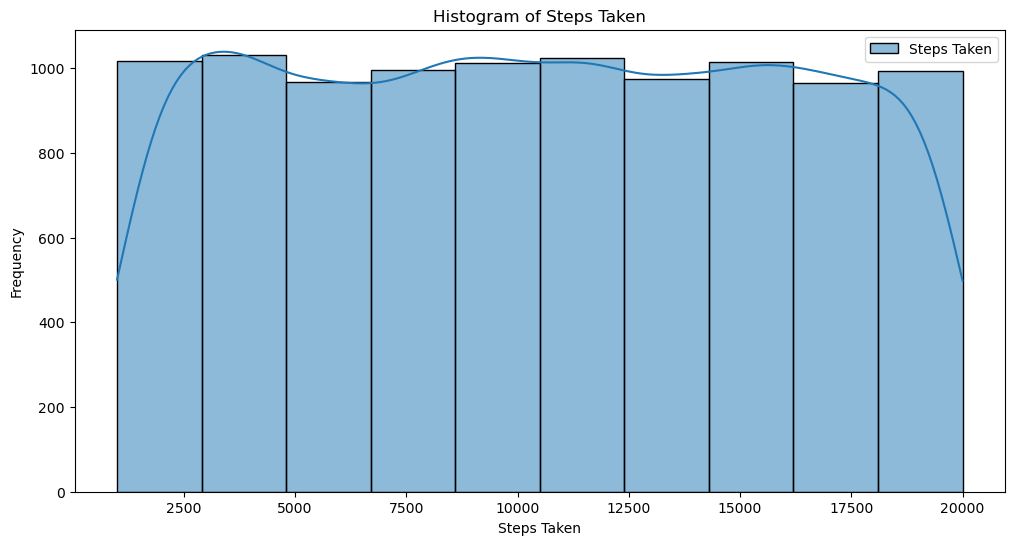

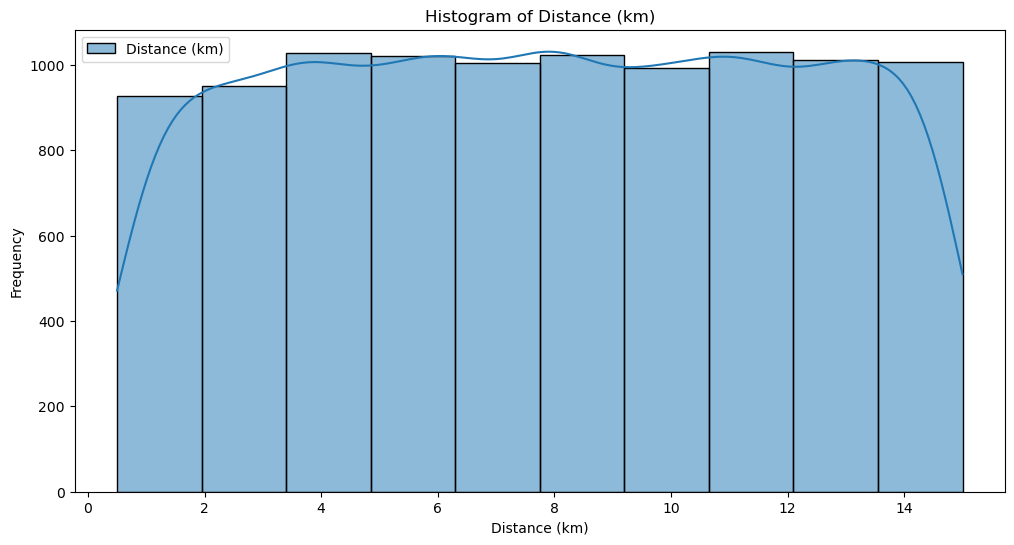

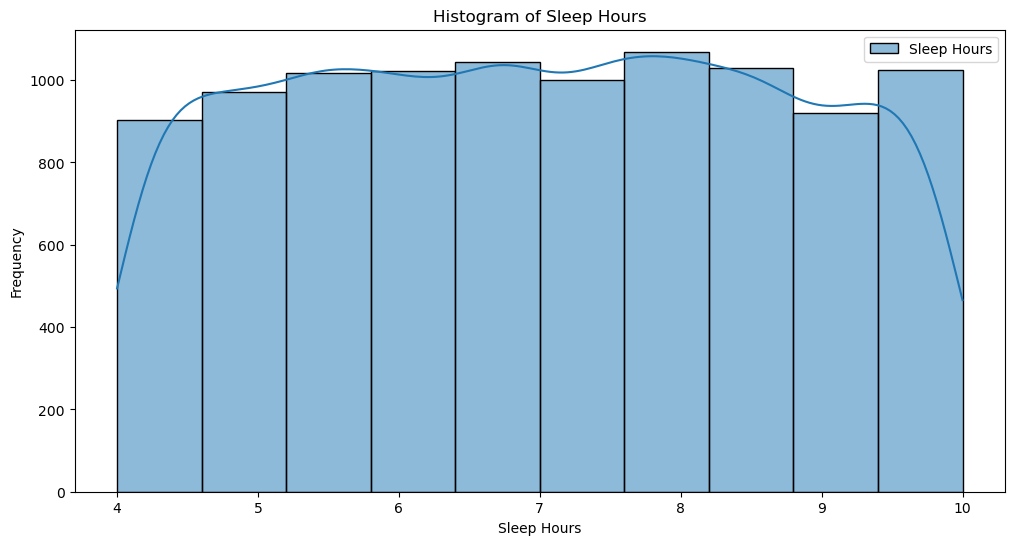

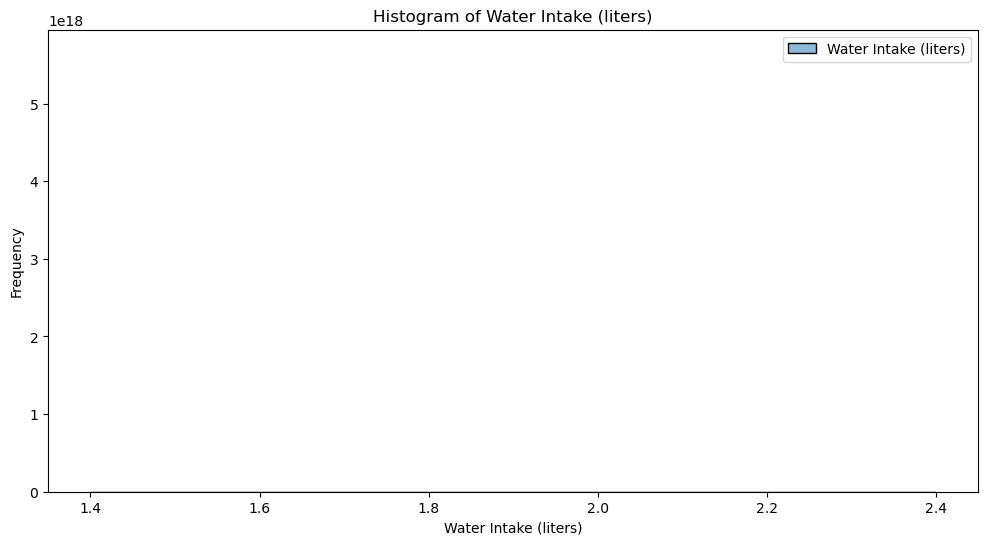

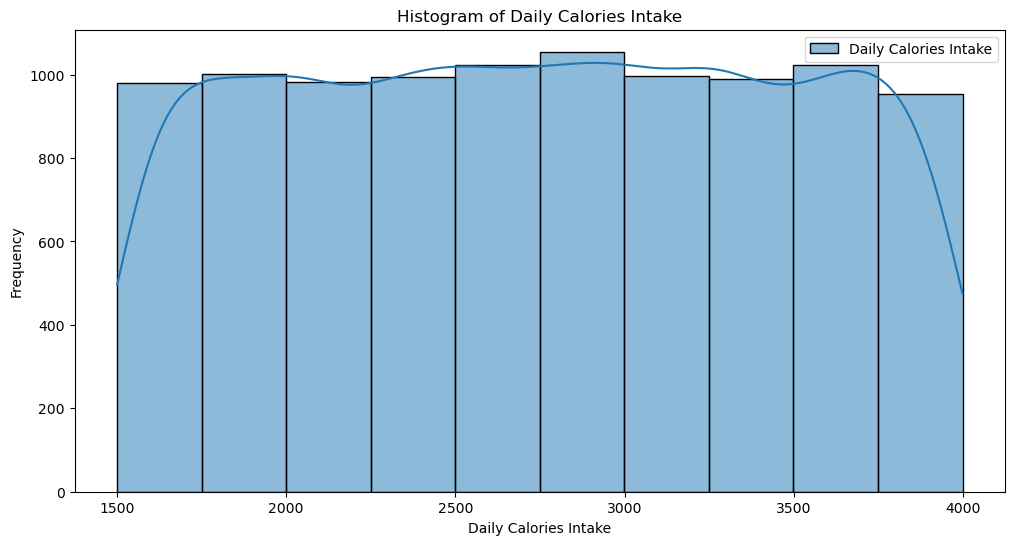

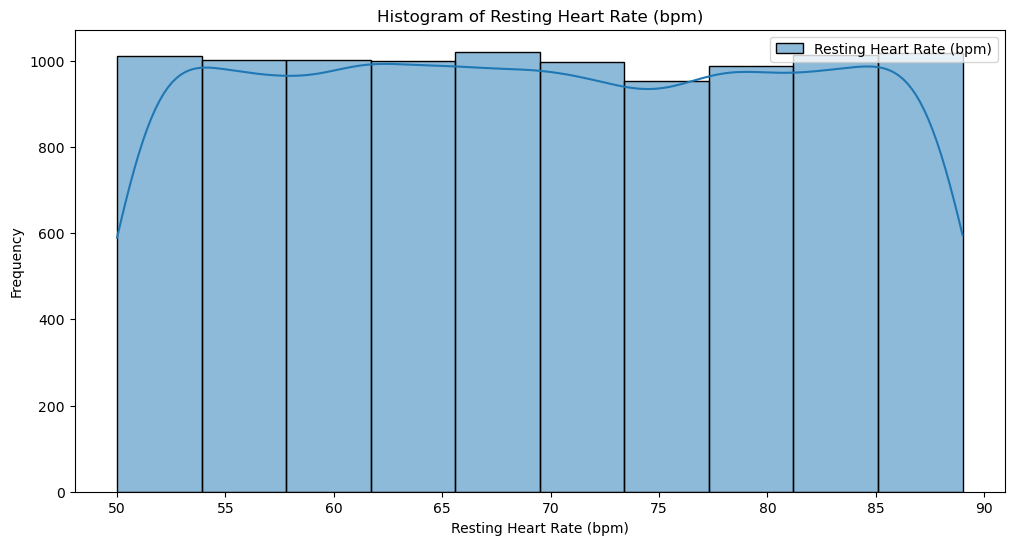

In [14]:
for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[[col]], kde=True, color=colors, bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout
    plt.show()

## Visualization

### 1. Calories Burned vs Workout Duration

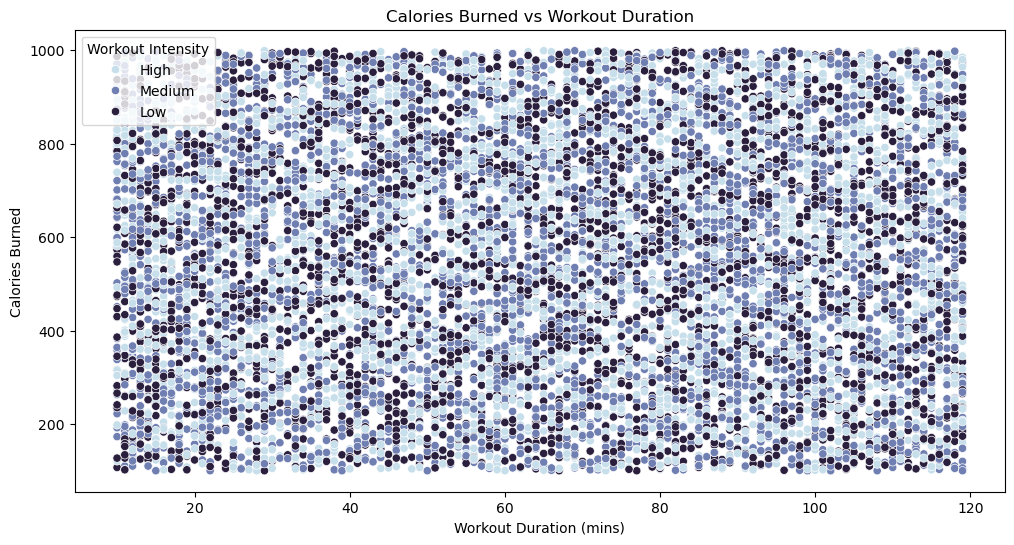

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Workout Duration (mins)'], y=df['Calories Burned'], hue=df['Workout Intensity'], palette='ch:s=.25,rot=-.25')
plt.title('Calories Burned vs Workout Duration')
plt.xlabel('Workout Duration (mins)')
plt.ylabel('Calories Burned')
plt.show()

### 2. Steps Taken vs Distance (km)

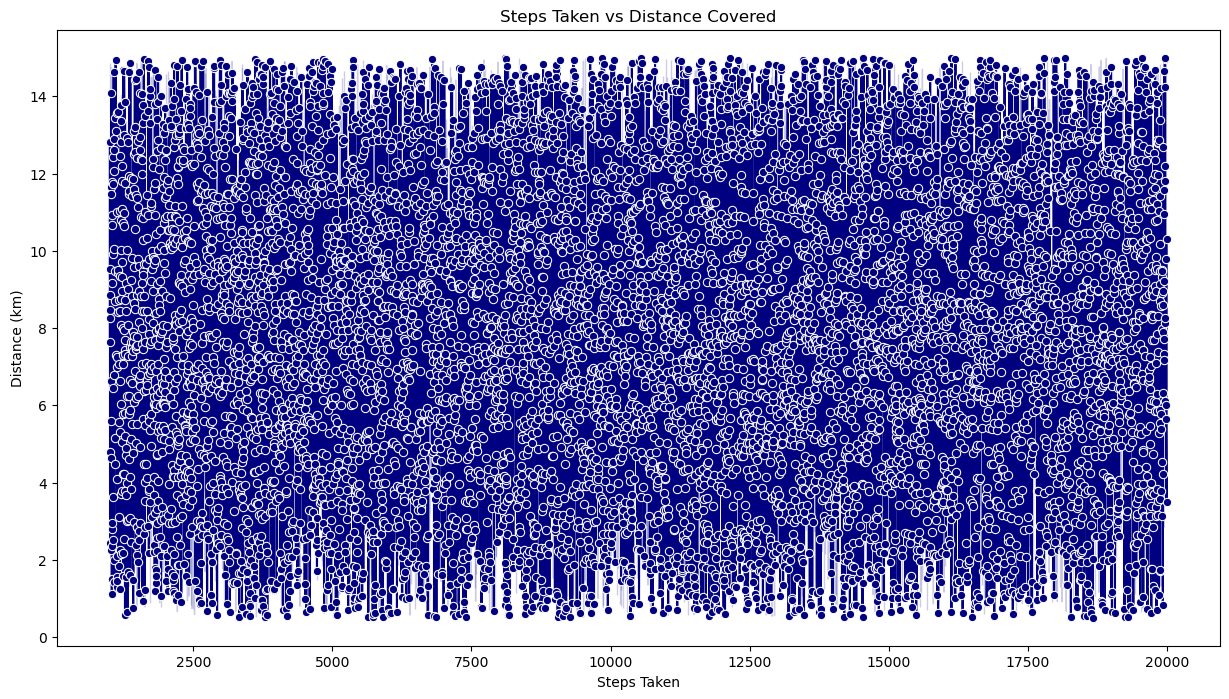

In [47]:
plt.figure(figsize=(15, 8))
sns.lineplot(x=df['Steps Taken'], y=df['Distance (km)'], marker='o', color='#000080')
plt.title('Steps Taken vs Distance Covered')
plt.xlabel('Steps Taken')
plt.ylabel('Distance (km)')
plt.show()

### 3. Boxplot: Distribution Of Height (cm) vs Weight (kg)

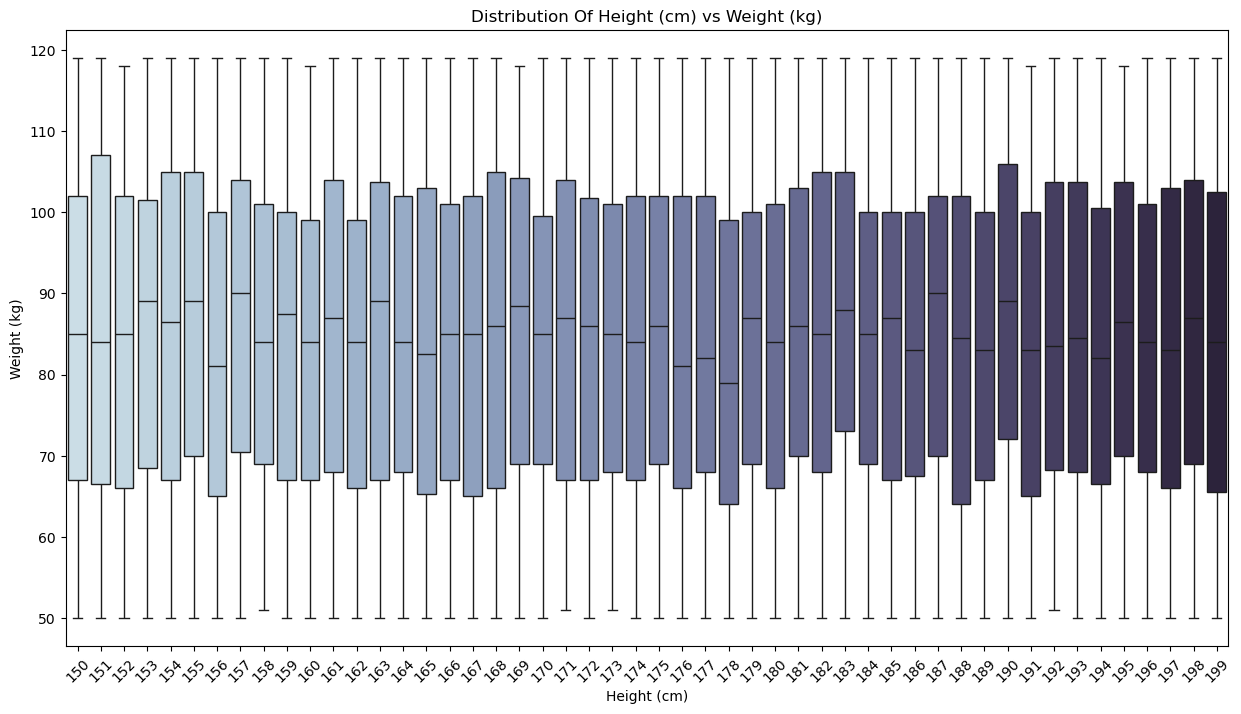

In [40]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=df['Height (cm)'], y=df['Weight (kg)'], data=df, palette='ch:s=.25,rot=-.25')
plt.title('Distribution Of Height (cm) vs Weight (kg)')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45)
plt.show()

### 4. Boxplot: Workout Intensity vs Sleep Hours

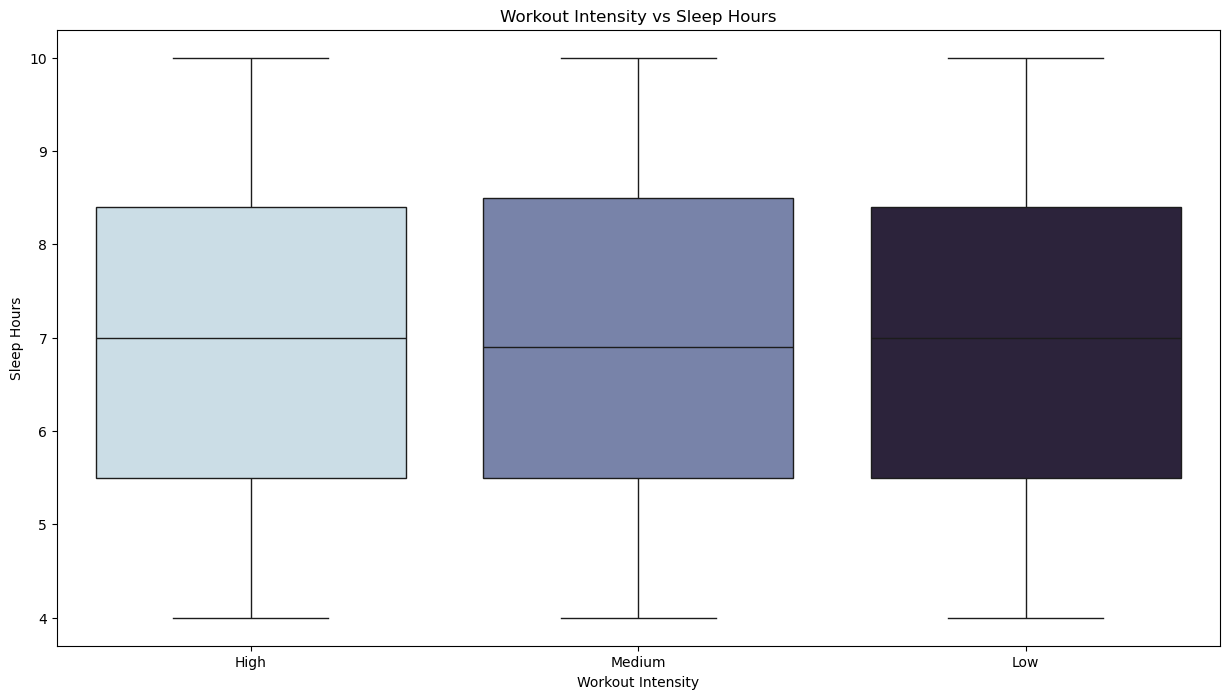

In [43]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=df['Workout Intensity'], y=df['Sleep Hours'], data=df, palette='ch:s=.25,rot=-.25')
plt.title('Workout Intensity vs Sleep Hours')
plt.xlabel('Workout Intensity')
plt.ylabel('Sleep Hours')
plt.show()

### 5. Violin: Heart Rate Distribution

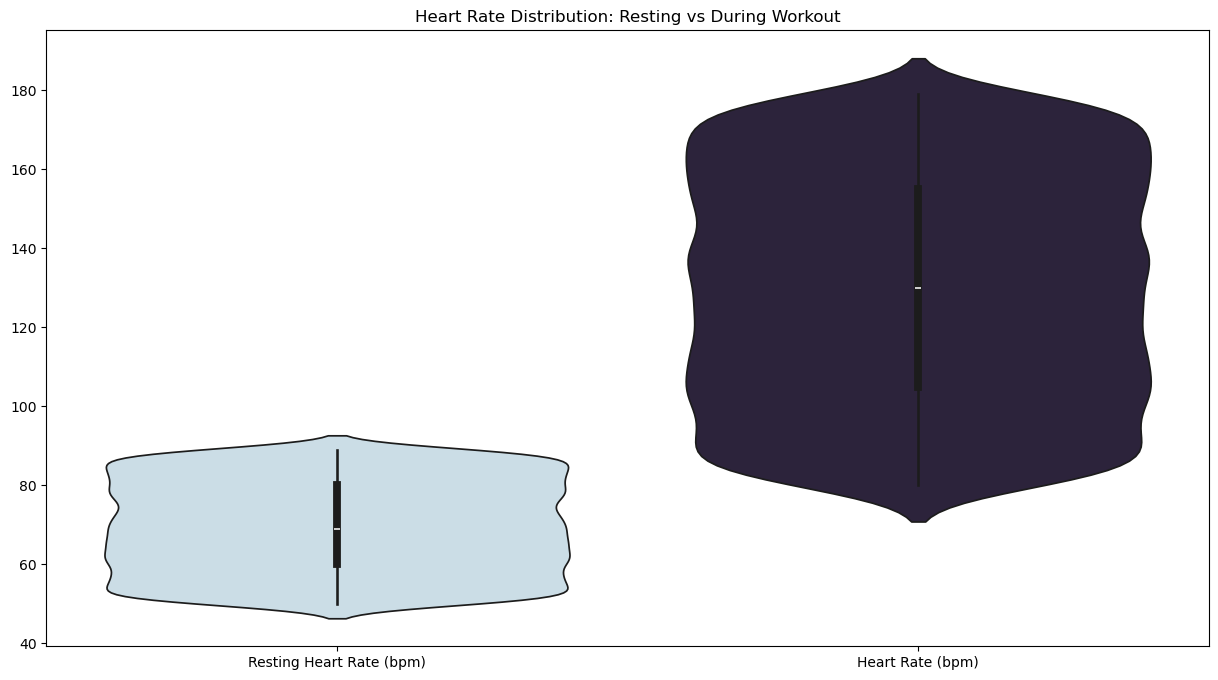

In [51]:
plt.figure(figsize=(15, 8))
sns.violinplot(data=df[['Resting Heart Rate (bpm)', 'Heart Rate (bpm)']], palette='ch:s=.25,rot=-.25')
plt.title('Heart Rate Distribution: Resting vs During Workout')
plt.show()

### 6. Mood Before vs After Workout

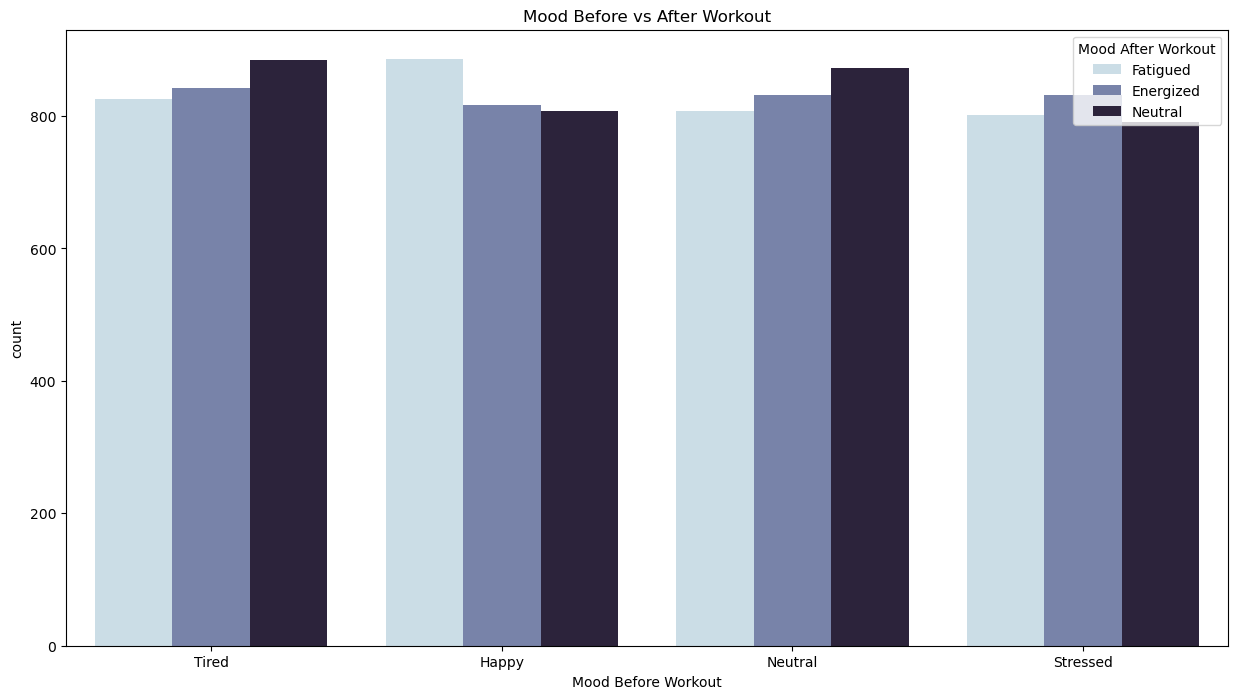

In [56]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df['Mood Before Workout'], hue=df['Mood After Workout'], palette='ch:s=.25,rot=-.25')
plt.title('Mood Before vs After Workout')
plt.xlabel('Mood Before Workout')
plt.ylabel('count')
plt.legend(title='Mood After Workout')
plt.show()

In [11]:
df

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,20,Other,173,59,Yoga,95,230,160,1330,12.83,Medium,10.0,1.9,3718,56,38.4,28.5,Neutral,Neutral
9996,9997,29,Female,171,71,HIIT,83,539,170,3236,9.74,Low,9.4,1.9,2752,72,38.4,28.5,Tired,Fatigued
9997,9998,47,Male,183,75,Running,89,886,114,10532,14.51,Medium,8.1,1.9,1572,73,38.4,28.5,Neutral,Fatigued
9998,9999,52,Male,170,97,HIIT,28,447,102,13690,1.43,Low,7.3,1.9,2172,84,38.4,28.5,Stressed,Fatigued


## Predictive Modeling

In [13]:
df = df.drop(columns = ['User ID'], errors='ignore')

In [15]:
features = ['Age', 'Height (cm)', 'Weight (kg)', 'Workout Duration (mins)', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Sleep Hours', 'Daily Calories Intake', 'Resting Heart Rate (bpm)']
target = 'Calories Burned'

X = df[features]
y = df[target]

### 1. Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape)

(7500, 10) (2500, 10)


### 2. Models

In [40]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [42]:
best_model = None
best_accuracy = 0
best_model_name = ''

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n {name} Accuracy: {accuracy}')


 Logistic Regression Accuracy: 0.0012

 Random Forest Accuracy: 0.0008

 Gradient Boosting Accuracy: 0.0004

 K-Nearest Neighbors Accuracy: 0.002


### 3. Best Model

In [46]:
if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = model
    best_model_name = name
    print(f'\n Best Model: {best_model_name} with Accuracy: {best_accuracy}')


 Best Model: K-Nearest Neighbors with Accuracy: 0.002


### 4. Confusion Matrix

In [56]:
y_pred_best = best_model.predict(X_test)
print(f'\n Classification Report: \n', classification_report(y_test, y_pred_best))


 Classification Report: 
               precision    recall  f1-score   support

         100       0.00      0.00      0.00         2
         101       0.00      0.00      0.00         1
         102       0.00      0.00      0.00         4
         103       0.00      0.00      0.00         1
         104       0.00      0.00      0.00         4
         105       0.00      0.00      0.00         2
         106       0.00      0.00      0.00         6
         107       0.00      0.00      0.00         2
         108       0.00      0.00      0.00         2
         109       0.00      0.00      0.00         2
         110       0.05      0.25      0.08         4
         111       0.00      0.00      0.00         1
         112       0.00      0.00      0.00         4
         113       0.00      0.00      0.00         1
         114       0.00      0.00      0.00         2
         115       0.00      0.00      0.00         4
         116       0.00      0.00      0.00         5


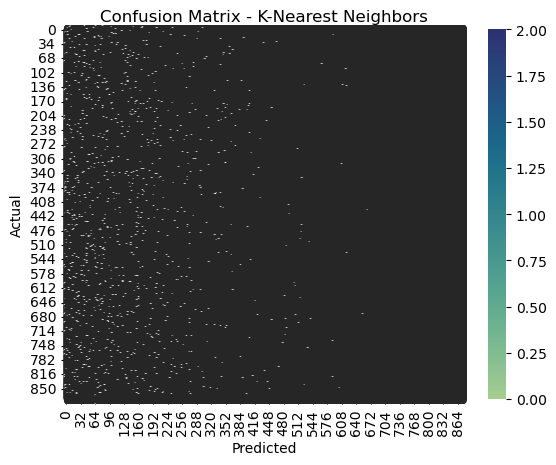

In [62]:
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()